In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [147]:
data = []
tempvalues = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/src/actor_critic/logs/Episode Ending actions_roundclip.csv', 'r') as file:
    for line in file:
      
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').replace('"','').split()
        if len(values)!= 6:
            tempvalues.extend(values)

        else:
            if len(tempvalues)==6:
                data.append([float(num) for num in tempvalues])
                tempvalues = []
            else:    
                data.append([float(num) for num in values])

data = np.array(data)

data = data[[len(row) == 6 for row in data]]


bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]



In [148]:
good_data = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/src/actor_critic/logs/Good actions_roundclip.csv', 'r') as file:
    for line in file:
       
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').split(",")
        
        good_data.append([float(num) for num in values])
good_data = np.array(good_data)
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

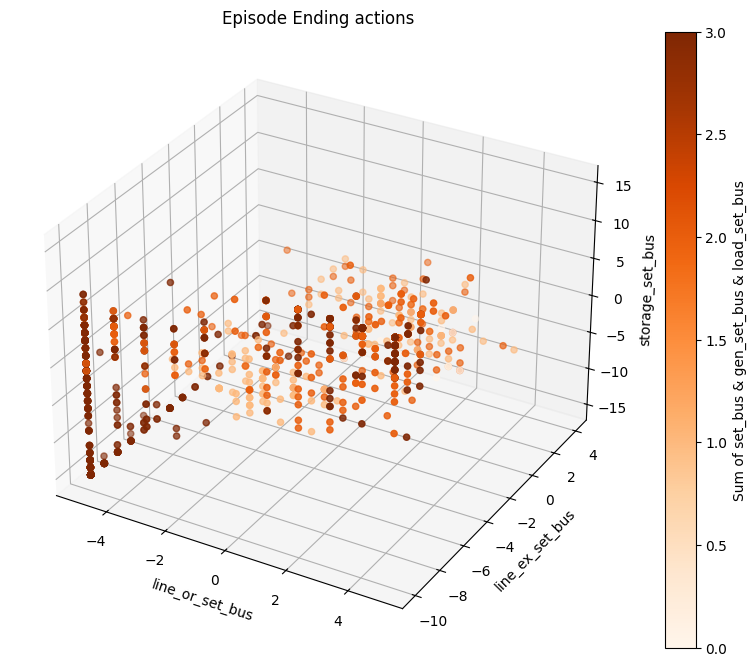

In [71]:

# Assume `data` is already loaded as in your provided code
bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(bad_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                c=colors, cmap='Oranges', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')


# Add labels and title
ax.set_title('Episode Ending actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')

# Show the plot
plt.show()

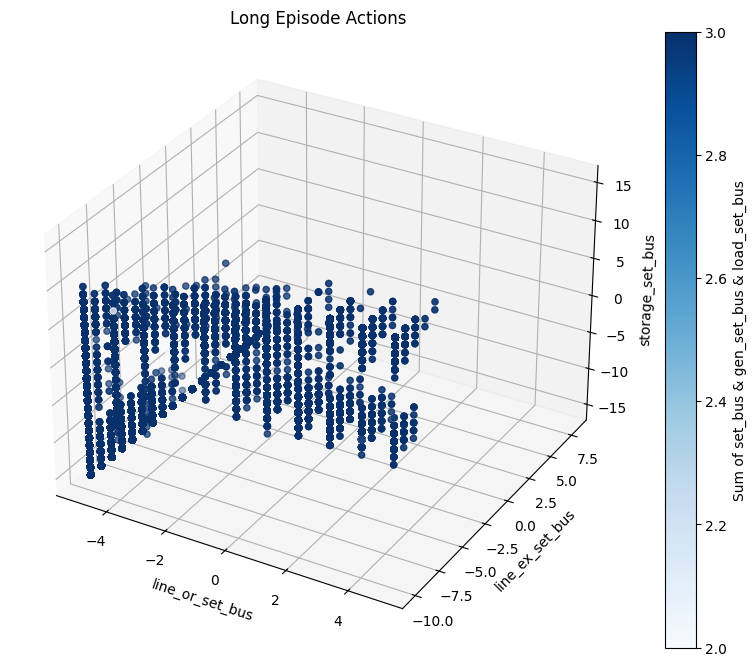

In [70]:

# Assume `data` is already loaded as in your provided code
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(good_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                c=colors, cmap='Blues', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')

# Add labels and title
ax.set_title('Long Episode Actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')


# Show the plot
plt.show()

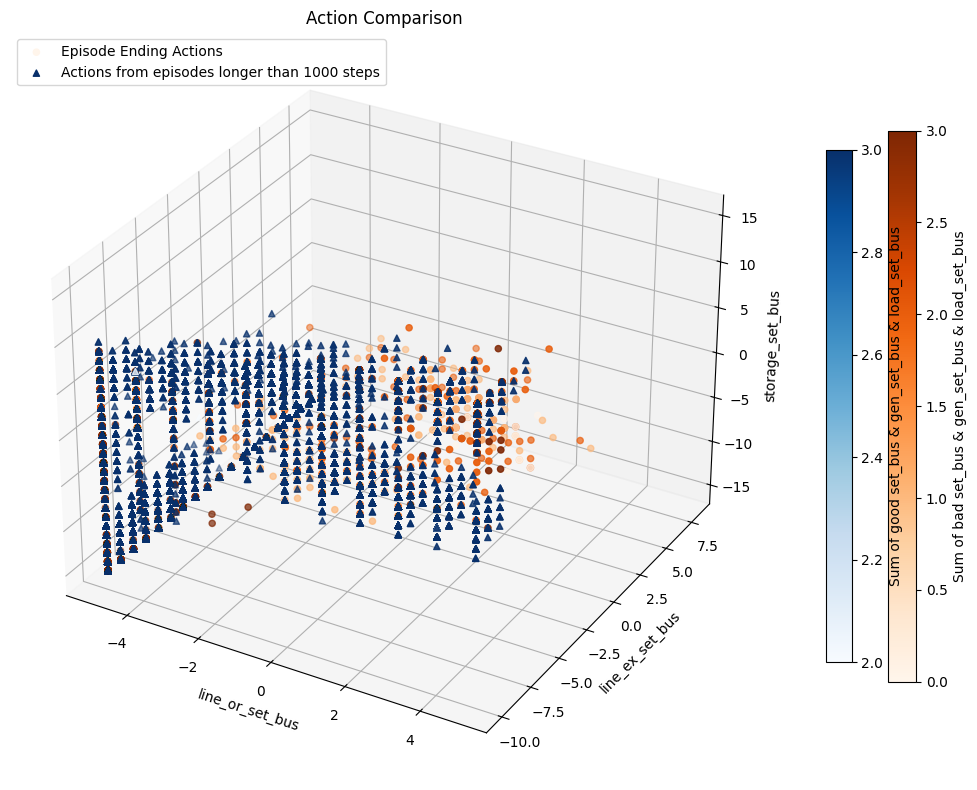

In [149]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors based on the sum of the first three values
bad_colors = np.sum(bad_first_three, axis=1)
good_colors = np.sum(good_first_three, axis=1)

# Scatter plot for bad_last_three with 'Oranges' colormap
sc_bad = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                    c=bad_colors, cmap='Oranges', marker='o', label='Episode Ending Actions')

# Scatter plot for good_last_three with 'Blues' colormap
sc_good = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                     c=good_colors, cmap='Blues', marker='^', label='Actions from episodes longer than 1000 steps')

# Add color bars for each scatter plot to interpret the color coding
cbar_bad = plt.colorbar(sc_bad, ax=ax, fraction=0.03, pad=0.04)
cbar_good = plt.colorbar(sc_good, ax=ax, fraction=0.03, pad=0.08)

cbar_bad.set_label('Sum of bad set_bus & gen_set_bus & load_set_bus', fontsize=10)
cbar_good.set_label('Sum of good set_bus & gen_set_bus & load_set_bus', fontsize=10)

# Add labels, title, and legend
ax.set_title('Action Comparison')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

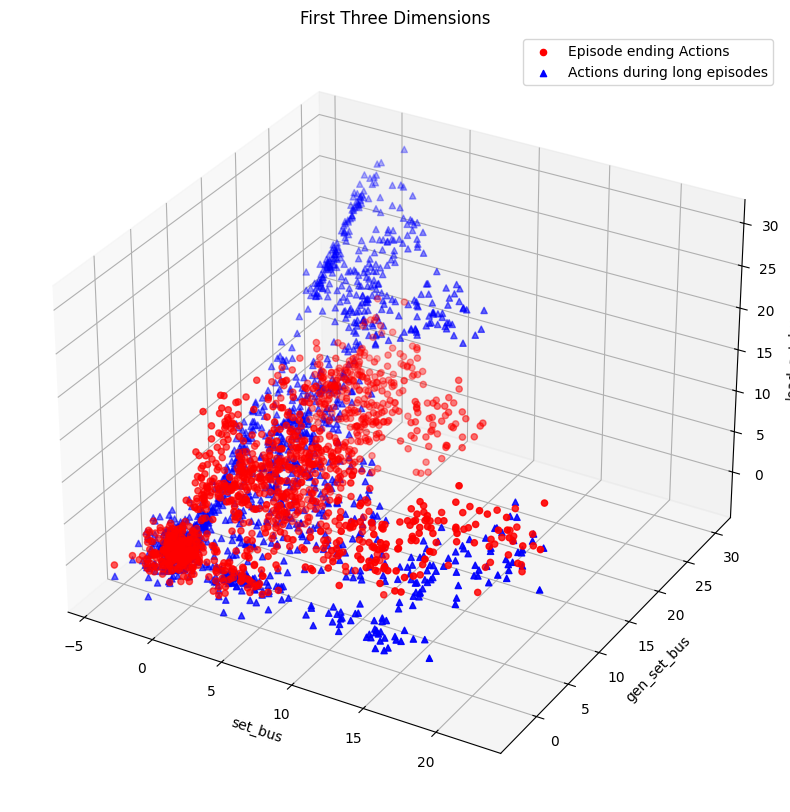

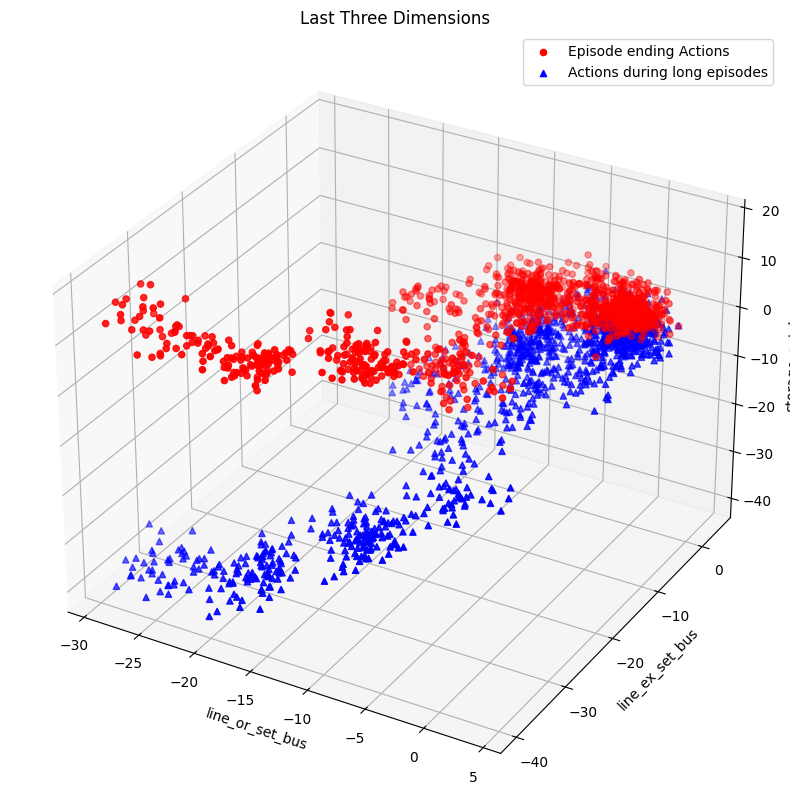

In [48]:

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(bad_first_three[:, 0], bad_first_three[:, 1], bad_first_three[:, 2], c='red', marker='o', label="Episode ending Actions")
ax1.scatter(good_first_three[:,0], good_first_three[:, 1], good_first_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax1.set_title('First Three Dimensions')
ax1.set_xlabel('set_bus')
ax1.set_ylabel('gen_set_bus')
ax1.set_zlabel('load_set_bus')
ax1.legend()


fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], c='red', marker='o',  label="Episode ending Actions")
ax2.scatter(good_last_three[:,0], good_last_three[:, 1], good_last_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax2.set_title('Last Three Dimensions')
ax2.set_xlabel('line_or_set_bus')
ax2.set_ylabel('line_ex_set_bus')
ax2.set_zlabel('storage_set_bus')
ax2.legend()

plt.show()

## Multi-agent

In [163]:

def plot_reward(path1,path4):
    rewards1 = []
    rewards2 = []
    rewards3 = []
    rewards4 = []

    with open(path1, 'r') as file:
        for line in file:
            value = float(line.strip())
            rewards1.append(value)
    
    

    with open(path4, 'r') as file:
        for line in file:
            value = float(line.strip())
            rewards4.append(value)


    print("Max reward of Multi-Agent Actor Critic: ", np.max(rewards1))
    print("Mean reward of Multi-Agent Actor Critic: ", np.mean(rewards1))
    
    print("Max reward of Multi-Discrete: ", np.max(rewards4))
    print("Mean length of Multi-Discrete: ", np.mean(rewards4))
    
    n_eps1 = len(rewards1)
    mean_rewards1 = np.array([np.mean(rewards1[-n_eps1 +i -49:-(n_eps1 - i) + 1]) if i != n_eps1 - 1
                                   else np.mean(rewards1[-n_eps1 +i -49:]) for i in range(n_eps1)])

    n_eps4 = len(rewards4)
    mean_rewards4 = np.array([np.mean(rewards4[-n_eps4 +i -49:-(n_eps4 - i) + 1]) if i != n_eps4 - 1
                                   else np.mean(rewards4[-n_eps4 +i -49:]) for i in range(n_eps4)])
    

    x = plt.figure(figsize=(10, 6))
    plt.plot(range(n_eps1), mean_rewards1,color = 'green',label = "Multi-Agent Actor-Critic")  
    plt.plot(range(n_eps4), mean_rewards4,color = 'purple', label = "Multi-Discrete Action Space")
    plt.title('Smoothed Rewards Per episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend()
    plt.show()
    x.savefig("Final_rewards.pdf")

def plot_length(path1,path4):
    rewards1 = []
    rewards2 = []
    rewards3 = []
    rewards4 = []

    with open(path1, 'r') as file:
        for line in file:
            value = float(line.strip())
            rewards1.append(value)
    
    

    with open(path4, 'r') as file:
        for line in file:
            value = float(line.strip())
            rewards4.append(value)


    print("Max length of Multi-Agent Actor Critic: ", np.max(rewards1))
    print("Mean length of Multi-Agent Actor Critic: ", np.mean(rewards1))
    print("Max length of Multi-Discrete: ", np.max(rewards4))
    print("Mean length of Multi-Discrete: ", np.mean(rewards4))
    
    n_eps1 = len(rewards1)
    mean_rewards1 = np.array([np.mean(rewards1[-n_eps1 +i -49:-(n_eps1 - i) + 1]) if i != n_eps1 - 1
                                   else np.mean(rewards1[-n_eps1 +i -49:]) for i in range(n_eps1)])
    
    n_eps4 = len(rewards4)
    mean_rewards4 = np.array([np.mean(rewards4[-n_eps4 +i -49:-(n_eps4 - i) + 1]) if i != n_eps4 - 1
                                   else np.mean(rewards4[-n_eps4 +i -49:]) for i in range(n_eps4)])
    

    v = plt.figure(figsize=(10, 6))
    plt.plot(range(n_eps1), mean_rewards1,color = 'green',label = "Multi-Agent Actor-Critic")  
    plt.plot(range(n_eps4), mean_rewards4,color = 'purple', label = "Multi-Discrete Action Space")
    plt.title('Smoothed Length Per episode')
    plt.xlabel('Length')
    plt.ylabel('Reward')
    plt.grid()
    plt.legend()
    plt.show()
    v.savefig("Final_length.pdf")
  



Max reward of Multi-Agent Actor Critic:  2638.2605485767126
Mean reward of Multi-Agent Actor Critic:  561.6715986990508
Max reward of Multi-Discrete:  2249.496652394533
Mean length of Multi-Discrete:  447.4798247527927


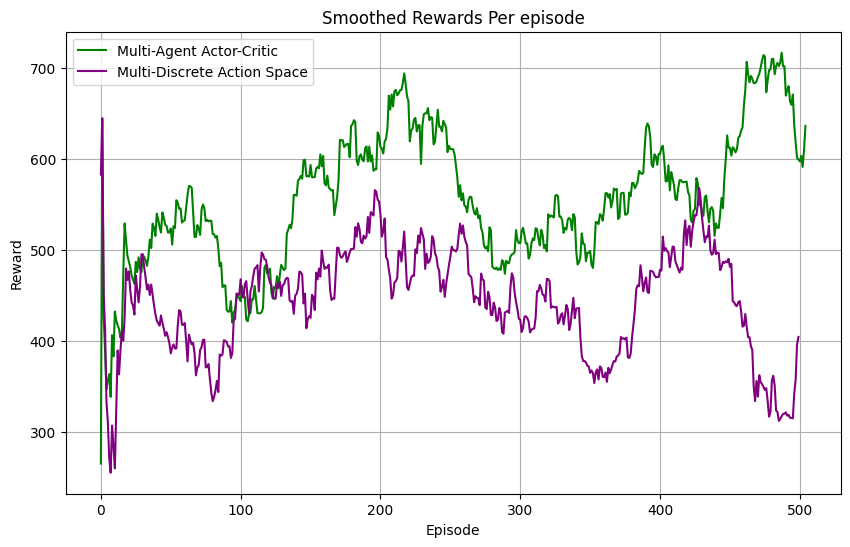

Max length of Multi-Agent Actor Critic:  8064.0
Mean length of Multi-Agent Actor Critic:  1695.3049504950495
Max length of Multi-Discrete:  6905.0
Mean length of Multi-Discrete:  1379.98


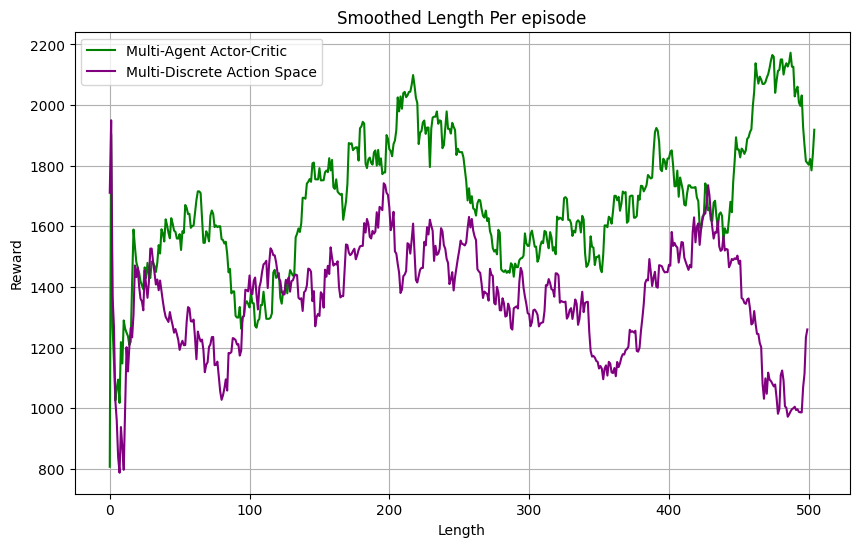

In [164]:
newpaths = ["/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_rewards.txt",
            "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/MDA_rewards.txt",
         ]
plot_reward(newpaths[0],newpaths[1])

plot_length("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_length.txt",
            "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/MDA_length.txt"
            )

In [155]:
def read_reward_files_three(path1,path2,path3):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    

    print("Max Reward of Discrete Action space ", np.max(value1))
    print("Max Reward of Multi Discrete Action space ", np.max(value2))
    print("Max Reward of Continuous Action Space ", np.max(value3))

    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Discrete Action Space")
    plt.plot(step2, otherrewards,color = 'red', label="Multi-Discrete Action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="Continuous Action Space")
   
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Baseline_episode_rewards.pdf', bbox_inches='tight')


def read_length_files_three(path1,path2,path3):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)

    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step3.append(int(row[0]))       # First value (step)
            value3.append(float(row[1]))    # Second value (value)
    
    print("Max Length of Discrete Action space ", np.max(value1))
    print("Max Length of Multi Discrete Action space ", np.max(value2))
    print("Max Length of Continuous Action space ", np.max(value3))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    f =plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Discrete Action Space")
    plt.plot(step2, otherrewards, color = 'red', label="Multi-Discrete Action Space")
    plt.plot(step3, thirdrewards, color = 'blue', label="Continuous Action Space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Length')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Baseline_episode_lengths.pdf', bbox_inches='tight')

## 3 Action Spaces

Max Reward of Discrete Action space  851.5497436523438
Max Reward of Multi Discrete Action space  1008.9953002929688
Max Reward of Continuous Action Space  620.75830078125


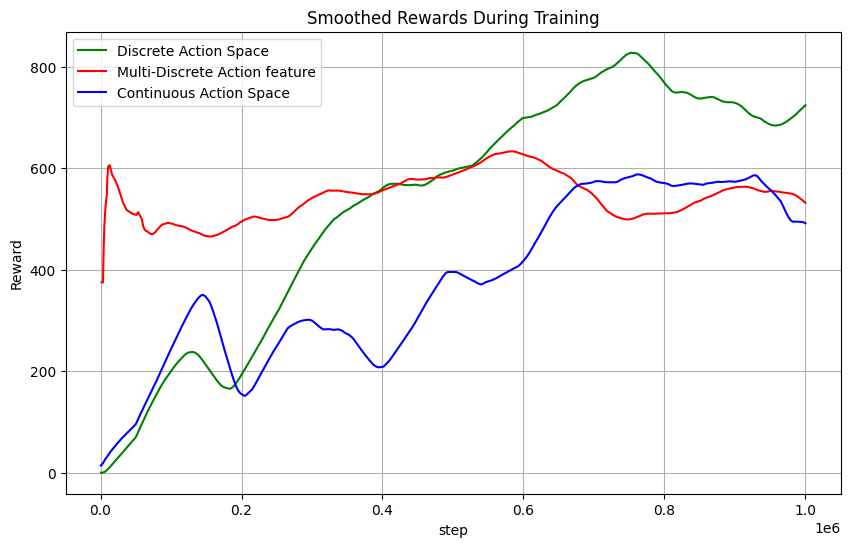

Max Length of Discrete Action space  2457.1201171875
Max Length of Multi Discrete Action space  3064.333251953125
Max Length of Continuous Action space  1794.969970703125


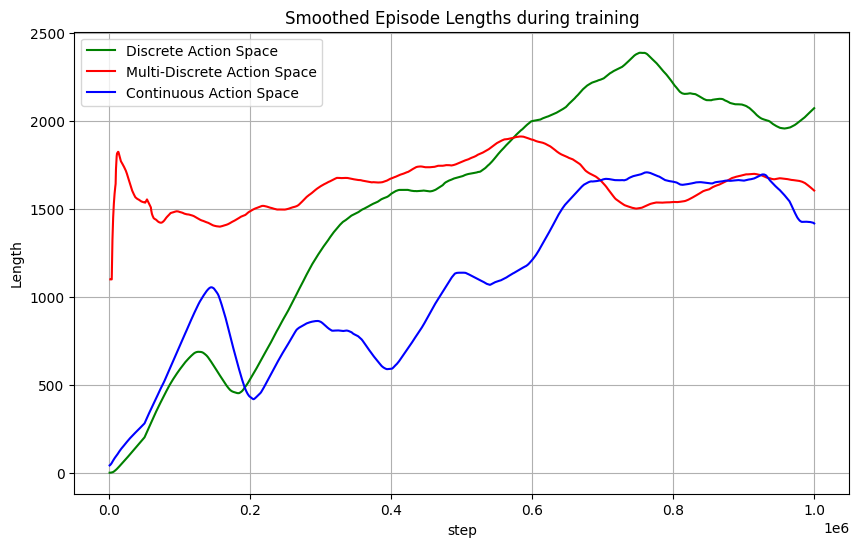

In [156]:

read_reward_files_three("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_discrete.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_cont.csv")

read_length_files_three("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_discrete.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_MDA_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_cont.csv")
                    

## Reduced Observation on set_line_status

In [157]:
def read_reward_files_two(path1,path2):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    

# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
   

    

    print("Max Reward of Entire Observation space ", np.max(value1))
    print("Max Reward of Reduced Observation space ", np.max(value2))
 

    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    
    
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Entire Observation Space")
    plt.plot(step2, otherrewards,color = 'red', label="Reduced Observation Space")
   
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Observation_space_comparison_reward.pdf', bbox_inches='tight')


def read_length_files_two(path1,path2):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
  
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)

    
    print("Max Length of Entire Observation Space ", np.max(value1))
    print("Max Length of Reduced Observation Space ", np.max(value2))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    z =plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Entire Observation Space")
    plt.plot(step2, otherrewards, color = 'red', label="Reduced Observation Space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Length')
    plt.legend()
    plt.grid()
    plt.show()
    
    z.savefig('Observation_space_comparison_length.pdf', bbox_inches='tight')

Max Reward of Entire Observation space  645.5579223632812
Max Reward of Reduced Observation space  642.3131103515625


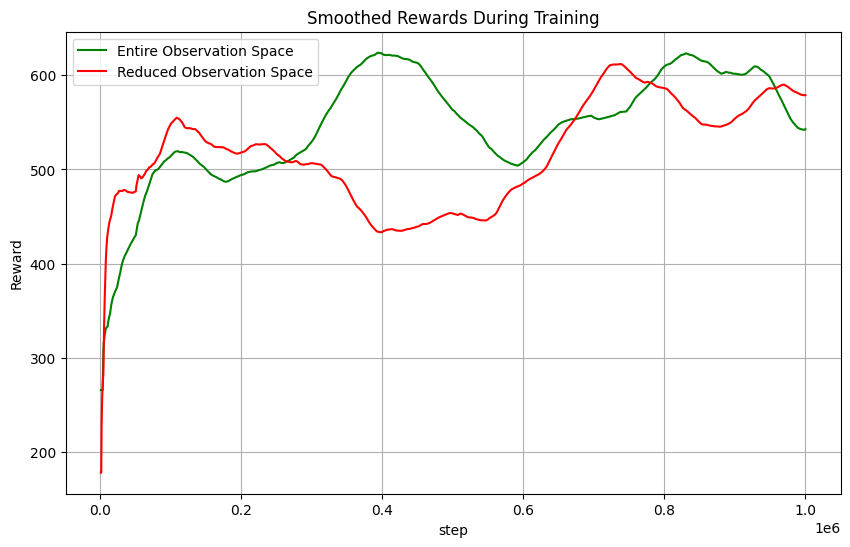

Max Length of Entire Observation Space  1951.9599609375
Max Length of Reduced Observation Space  1939.77001953125


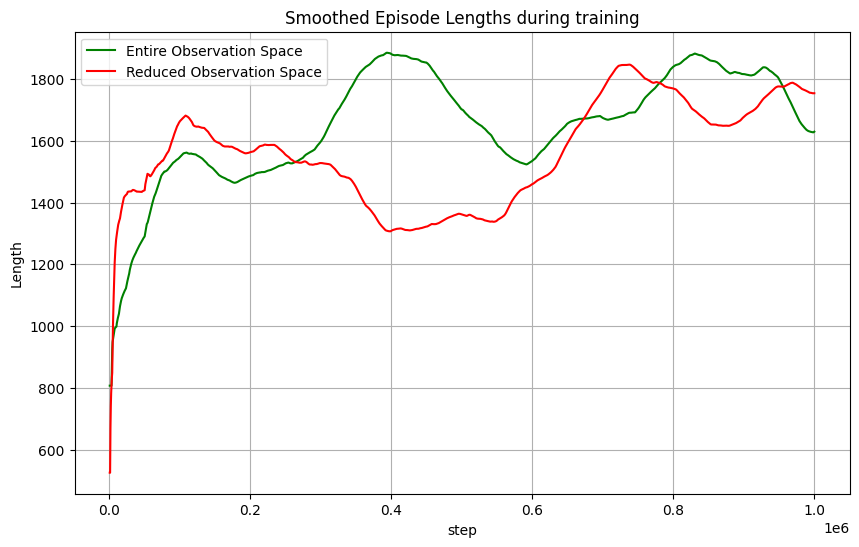

In [158]:
read_reward_files_two("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_ro.csv")

read_length_files_two("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_ro.csv")

## Different MDA Action Features

In [159]:
def read_reward_files_five(path1,path2,path3, path4, path5):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

    step4 = []
    value4 = []

    step5 = []
    value5 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    with open(path4, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step4.append(int(row[0]))       
            value4.append(float(row[1]))
    
    with open(path5, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step5.append(int(row[0]))       
            value5.append(float(row[1]))

    print("Max Reward of All Action feature space ", np.max(value1))
    print("Max Reward of set_line_status Action feature ", np.max(value2))
    print("Max Reward of set_bus Action feature ", np.max(value3))
    print("Max Reward of sub_set_bus Action feature ", np.max(value4))
    print("Max Reward of Three Action features ", np.max(value5))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value4)
    fourthrewards = np.array([np.mean(value4[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value4[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value5)
    fifthrewards = np.array([np.mean(value5[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value5[-n_eps +i -99:]) for i in range(n_eps)])
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="All action features")
    plt.plot(step2, otherrewards,color = 'red', label="set_line_status action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="set_bus action feature")
    plt.plot(step4, fourthrewards,color = 'purple', label="sub_set_bus action feature")
    #plt.plot(step5, fifthrewards,color = 'yellow', label="Three Actions space")
    
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Comparing_action_spaces.pdf', bbox_inches='tight')

def read_length_files_five(path1,path2,path3, path4, path5):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

    step4 = []
    value4 = []

    step5 = []
    value5 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    with open(path4, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step4.append(int(row[0]))       
            value4.append(float(row[1]))
    
    with open(path5, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step5.append(int(row[0]))       
            value5.append(float(row[1]))

    print("Max Length of All Action feature space ", np.max(value1))
    print("Max Length of set_line_status Action feature ", np.max(value2))
    print("Max Length of set_bus Action feature ", np.max(value3))
    print("Max Length of sub_set_bus Action feature ", np.max(value4))
    print("Max Length of Three Action features ", np.max(value5))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value4)
    fourthrewards = np.array([np.mean(value4[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value4[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value5)
    fifthrewards = np.array([np.mean(value5[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value5[-n_eps +i -99:]) for i in range(n_eps)])
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="All action features")
    plt.plot(step2, otherrewards,color = 'red', label="set_line_status action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="set_bus action feature")
    plt.plot(step4, fourthrewards,color = 'purple', label="sub_set_bus action feature")
    #plt.plot(step5, fifthrewards,color = 'yellow', label="Three Actions space")
    
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Smoothed Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Episode length')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Comparing_action_spaces_lengths.pdf', bbox_inches='tight')

Max Reward of All Action feature space  1008.9953002929688
Max Reward of set_line_status Action feature  645.5579223632812
Max Reward of set_bus Action feature  883.982421875
Max Reward of sub_set_bus Action feature  926.299560546875
Max Reward of Three Action features  645.5579223632812


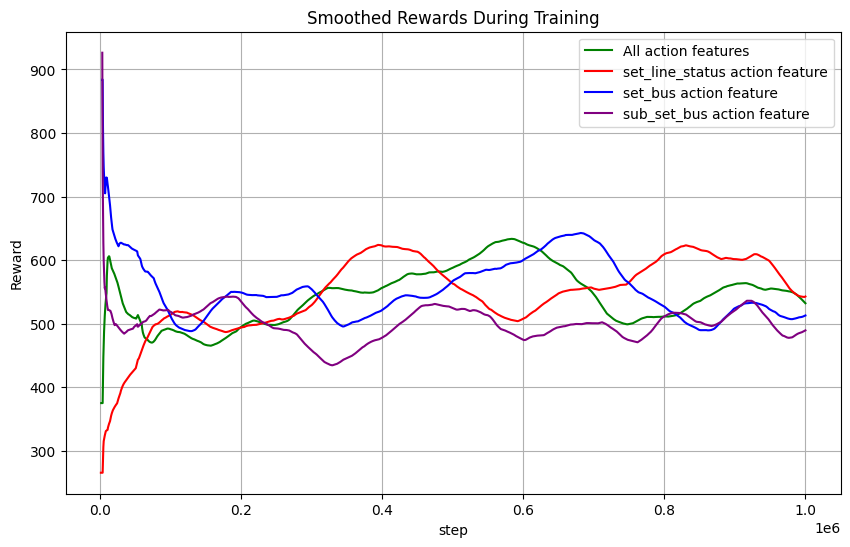

Max Length of All Action feature space  3064.333251953125
Max Length of set_line_status Action feature  1951.9599609375
Max Length of set_bus Action feature  2689.0
Max Length of sub_set_bus Action feature  2821.0
Max Length of Three Action features  1951.9599609375


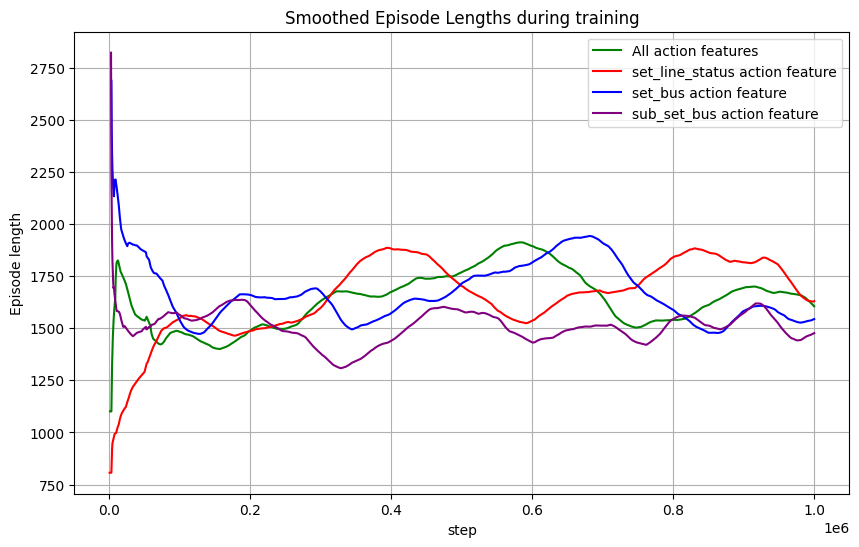

In [160]:


read_reward_files_five("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_set_bus_new.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_sub_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_3a.csv")

read_length_files_five("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_MDA_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_set_bus_new.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_sub_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_3a.csv")